## Desafio Hackathon 2020 - IA

#### Elaborado pela equipe de I.A. da Stefanini

##### Qual é o desafio?

A Stefanini decidiu começar a explorar os exoplanetas e validar como eles funcionam e como podemos explorá-los. Mas se o pesquisador conseguir explorar todos esses dados, ele precisa agora como bônus identificar se a terra é plana.

Os planetas foram encontrados em determinadas épocas e algumas coisas podem ser identificadas.

Nosso primeiro vislumbre de planetas fora do sistema solar que chamamos de lar surgiu em 1992, quando vários planetas de massa terrestre foram detectados orbitando o pulsar PSR B1257 + 12. Nesse conjunto de dados, você também pode se tornar um explorador espacial analisando as características de todos os exoplanetas descobertos (além de alguns rostos conhecidos como Marte, Saturno e até a Terra).

###### Dataset retirado: https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue

### Notebook Grupo 5


# 1 - Caio Costa Maciel Cardoso
# 2 - Gabriel Bonifácio Perez Nunes
# 3 - João Tribouillet Marcial de Menezes
# 4 - Luiz Fernando Neves de Araújo


In [0]:
# Imports
import pandas as pd
import numpy as np 


In [140]:
# Import dataset
planets = pd.read_csv('planets.csv')
planets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


### Descrição das colunas

Primary identifier of planet

Binary flag [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)]

Planetary mass [Jupiter masses]

Radius [Jupiter radii]

Period [days]

Semi-major axis [Astronomical Units]

Eccentricity

Periastron [degree]

Longitude [degree]

Ascending node [degree]

Inclination [degree]

Surface or equilibrium temperature [K]

Age [Gyr]

Discovery method

Discovery year [yyyy]

Last updated [yy/mm/dd]

Right ascension [hh mm ss]

Declination [+/-dd mm ss]

Distance from Sun [parsec]

Host star mass [Solar masses]

Host star radius [Solar radii]

Host star metallicity [log relative to solar]

Host star temperature [K]

Host star age [Gyr]

Planet Detection Status List [Confirmed, Candidate, etc..]

## Questão 1

Precisamos entender os dados para dar continuidade às demais questões. Para isso, necessitamos exibir massa estelar, raio, metalicidade e temperatura como gráfico de dispersão.

In [141]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
PlanetIdentifier        3584 non-null object
TypeFlag                3584 non-null int64
PlanetaryMassJpt        1313 non-null float64
RadiusJpt               2774 non-null float64
PeriodDays              3485 non-null float64
SemiMajorAxisAU         1406 non-null float64
Eccentricity            1108 non-null float64
PeriastronDeg           328 non-null float64
LongitudeDeg            43 non-null float64
AscendingNodeDeg        46 non-null float64
InclinationDeg          665 non-null float64
SurfaceTempK            741 non-null float64
AgeGyr                  2 non-null float64
DiscoveryMethod         3521 non-null object
DiscoveryYear           3574 non-null float64
LastUpdated             3576 non-null object
RightAscension          3574 non-null object
Declination             3574 non-null object
DistFromSunParsec       2133 non-null float64
HostStarMassSlrMass     3416 non-nul

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
x = planets.loc[pd.isnull(planets['PlanetaryMassJpt'])].index
z = planets.drop(x)
z

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.0370,270.60,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.0500,190.00,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.0,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
5,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,87.1,707.2,NaN,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.020,0.12,5777.0,NaN,Confirmed planets
6,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,87.2,557.9,NaN,transit,2010.0,15/12/03,19 02 17,+38 24 03,650.000,1.070,1.020,0.12,5777.0,NaN,Confirmed planets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,HAT-P-34 b,0,3.3280,1.197,5.452700,0.0677,0.4410,NaN,NaN,NaN,87.1,1335.3,NaN,transit,2012.0,13/05/29,20 12 46.885,+18 06 17.42,257.000,1.392,1.535,0.22,6442.0,NaN,Confirmed planets
3579,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.1700,247.20,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.0200,36.67,NaN,NaN,81.9,NaN,NaN,RV,2014.0,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.0700,NaN,NaN,NaN,NaN,256.8,NaN,RV,2003.0,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


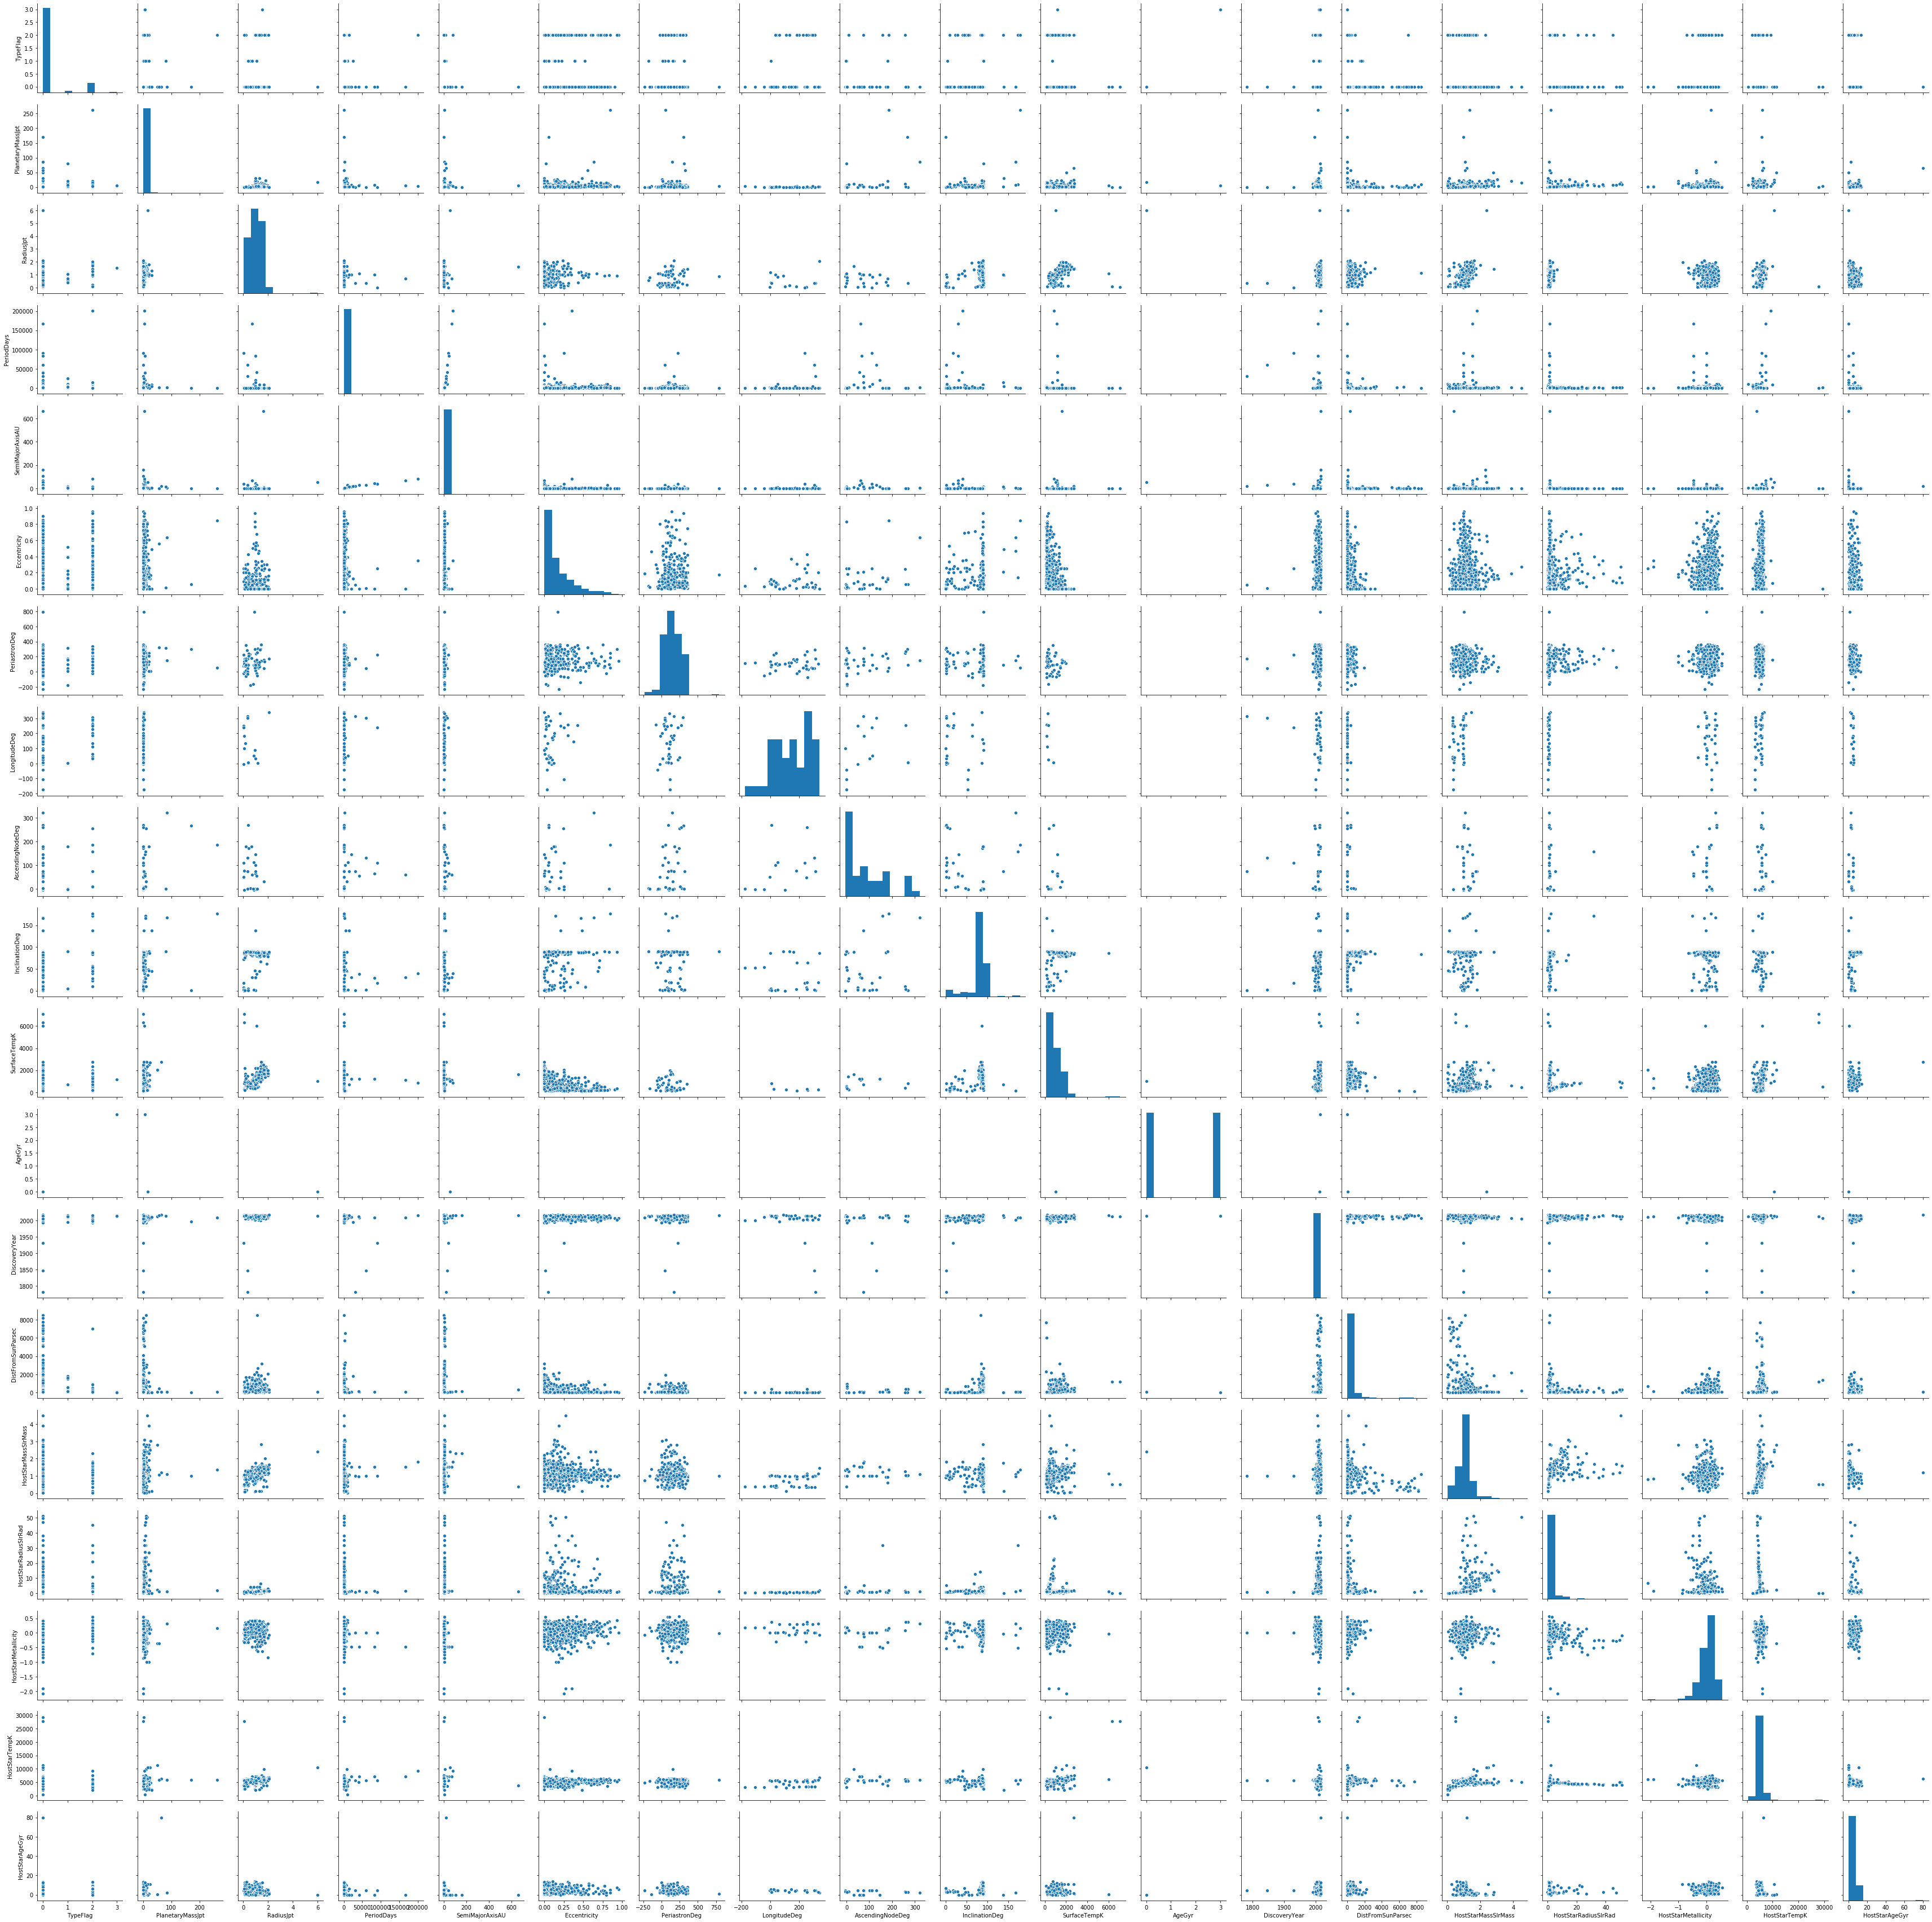

In [144]:
sns.pairplot(z, dropna = True)

## Questão 2

Spearman -> https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

No conjunto de dados temos algumas correlações fortes entre estrelas e planetas. Apresente as correlações.

In [0]:
def split1(s):
  try:
    return float(str(s).split(' ')[0]) * 3600 + float(str(s).split(' ')[1]) * 60 + float(str(s).split(' ')[2])
  except Exception as e:
    return s

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


label = LabelEncoder()
imp = SimpleImputer()
imp_freq = SimpleImputer()

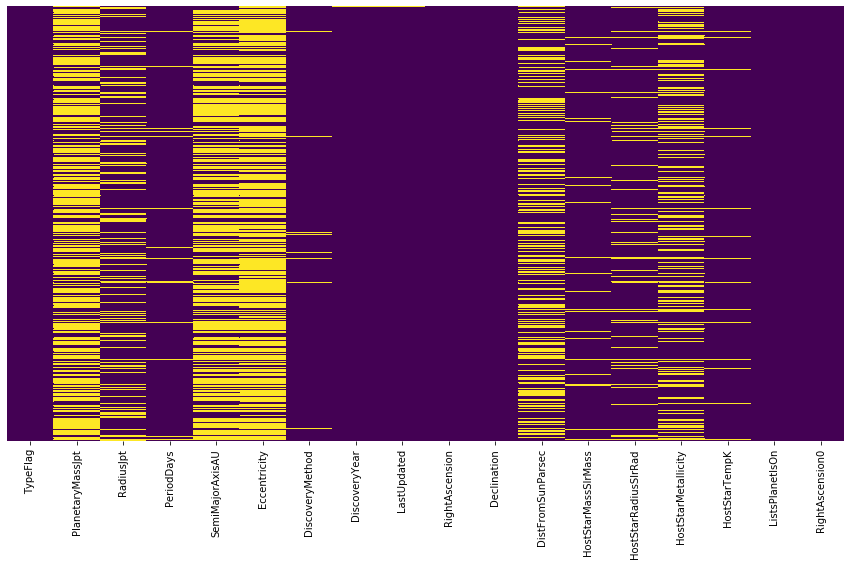

In [197]:
#Features que possuem frequêncisSignificativa


planets2 = planets.drop(['AgeGyr', 'PlanetIdentifier', 'LongitudeDeg','AscendingNodeDeg',
                         'PeriastronDeg','HostStarAgeGyr','SurfaceTempK','InclinationDeg'] , axis=1)
planets2["ListsPlanetIsOn"] = label.fit_transform(planets2["ListsPlanetIsOn"])



planets2['RightAscension0']= planets2['RightAscension'].apply(split1)

planets2['RightAscension0'].head()

planets2.dropna(subset=['RightAscension0'], inplace = True)

plt.figure(figsize = (15,8))
sns.heatmap(planets2.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')


In [234]:
planets3 = planets2.drop(['Eccentricity','SemiMajorAxisAU','PlanetaryMassJpt',
                          'DistFromSunParsec','HostStarMetallicity', 
                          'DiscoveryMethod','RightAscension','LastUpdated',
                          'Declination'],axis = 1)

planets3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574 entries, 0 to 3583
Data columns (total 9 columns):
TypeFlag                3574 non-null int64
RadiusJpt               2764 non-null float64
PeriodDays              3475 non-null float64
DiscoveryYear           3570 non-null float64
HostStarMassSlrMass     3407 non-null float64
HostStarRadiusSlrRad    3254 non-null float64
HostStarTempK           3445 non-null float64
ListsPlanetIsOn         3574 non-null int64
RightAscension0         3574 non-null float64
dtypes: float64(7), int64(2)
memory usage: 439.2 KB


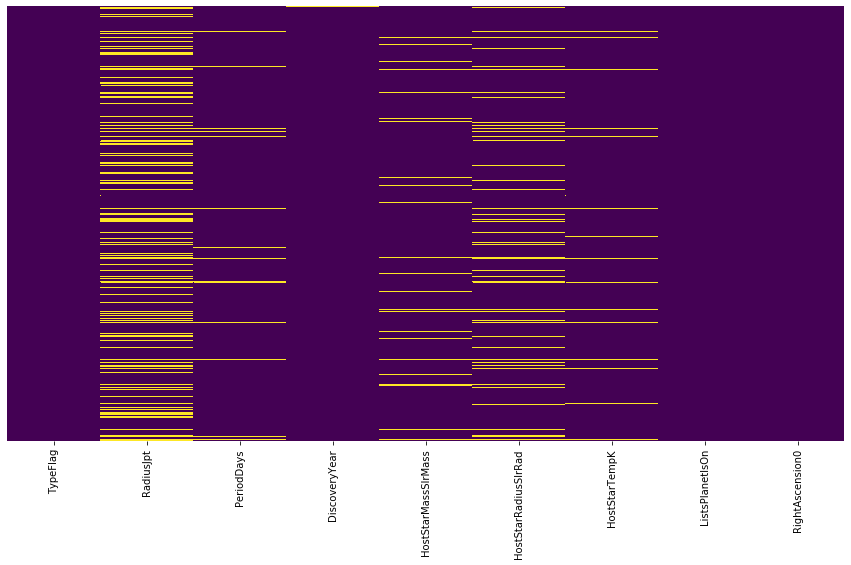

In [235]:
plt.figure(figsize = (15,8))
sns.heatmap(planets3.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

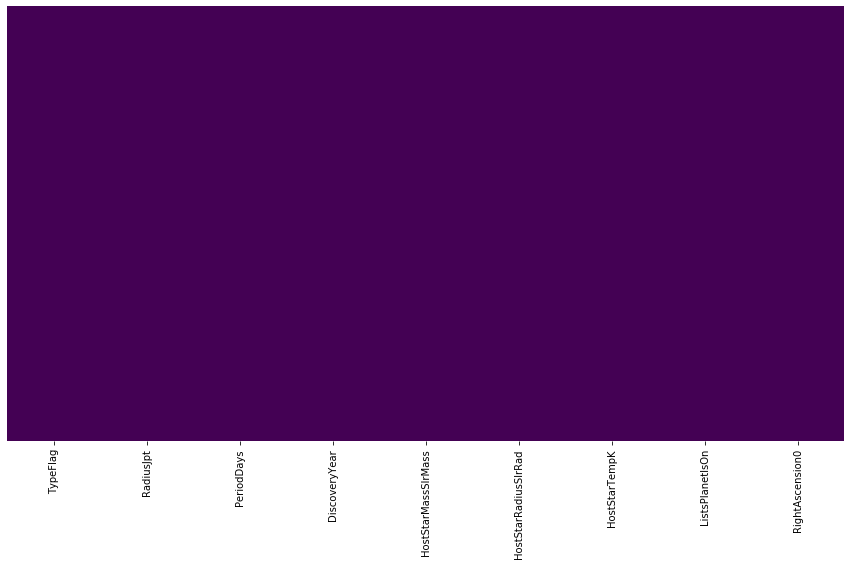

In [236]:
temp = imp.fit(planets3['PeriodDays'].values.reshape(-1,1))
planets3['PeriodDays'] = temp.transform(planets3['PeriodDays'].values.reshape(-1,1))

temp = imp.fit(planets3['DiscoveryYear'].values.reshape(-1,1))
planets3['DiscoveryYear'] = temp.transform(planets3['DiscoveryYear'].values.reshape(-1,1))


temp = imp.fit(planets3['HostStarMassSlrMass'].values.reshape(-1,1))
planets3['HostStarMassSlrMass'] = temp.transform(planets3['HostStarMassSlrMass'].values.reshape(-1,1))

temp = imp.fit(planets3['HostStarRadiusSlrRad'].values.reshape(-1,1))
planets3['HostStarRadiusSlrRad'] = temp.transform(planets3['HostStarRadiusSlrRad'].values.reshape(-1,1))

temp = imp.fit(planets3['HostStarTempK'].values.reshape(-1,1))
planets3['HostStarTempK'] = temp.transform(planets3['HostStarTempK'].values.reshape(-1,1))

temp = imp.fit(planets3['RadiusJpt'].values.reshape(-1,1))
planets3['RadiusJpt'] = temp.transform(planets3['RadiusJpt'].values.reshape(-1,1))


plt.figure(figsize = (15,8))
sns.heatmap(planets3.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

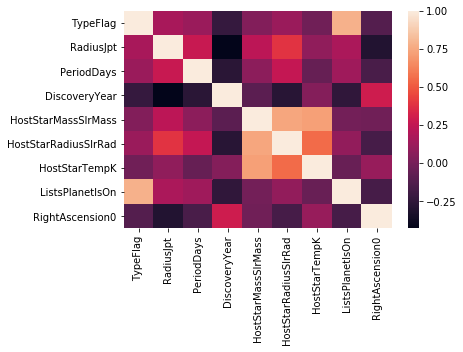

In [237]:
planets3.corr(method= 'spearman')
sns.heatmap(planets3.corr(method= 'spearman'))

## Questão 3

Devemos agora fazer um cluster para classificar corpos planetários. Você deve analisar quais variáveis serão necessárias para isso.

Deve-se organizar os dados de acordo com:
 - Planetas gigantes: isso deve incluir Júpiter, Saturno, Urano e Netuno.
 - Planetas terrestres: assim como os quatro planetas internos, incluir também as luas rochosas.

Depois de efetuar essa tarefa, deve-se utilizar uma técnica de classificação não supervisionada ou classificação supervisionada.

**O grupo deve avaliar e identificar qual é a melhor técnica para solucionar o problema.**

Deve-se identificar qual é o rótulo:
 - Planeta terrestre
 - Asteróide e/ou cometa
 - Planeta gigante
 - Lua Gelada

Deve-se produzir os números de cluster para cada corpo e, em seguida, fornecer os rótulos para cada um.

Reorganizaremos os clusters para que cada corpo no mesmo cluster receba um rótulo de categoria correspondente.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

tempo = scaler.fit(planets3['RadiusJpt'].values.reshape(-1,1))
planets3['RadiusJpt'] = scaler.transform(planets3['RadiusJpt'].values.reshape(-1,1))

tempo = scaler.fit(planets3['PeriodDays'].values.reshape(-1,1))
planets3['PeriodDays'] = scaler.transform(planets3['PeriodDays'].values.reshape(-1,1))

tempo = scaler.fit(planets3['DiscoveryYear'].values.reshape(-1,1))
planets3['DiscoveryYear'] = scaler.transform(planets3['DiscoveryYear'].values.reshape(-1,1))

tempo = scaler.fit(planets3['HostStarMassSlrMass'].values.reshape(-1,1))
planets3['HostStarMassSlrMass'] = scaler.transform(planets3['HostStarMassSlrMass'].values.reshape(-1,1))

tempo = scaler.fit(planets3['HostStarRadiusSlrRad'].values.reshape(-1,1))
planets3['HostStarRadiusSlrRad'] = scaler.transform(planets3['HostStarRadiusSlrRad'].values.reshape(-1,1))

tempo = scaler.fit(planets3['HostStarTempK'].values.reshape(-1,1))
planets3['HostStarTempK'] = scaler.transform(planets3['HostStarTempK'].values.reshape(-1,1))

tempo = scaler.fit(planets3['RightAscension0'].values.reshape(-1,1))
planets3['RightAscension0'] = scaler.transform(planets3['RightAscension0'].values.reshape(-1,1))

In [0]:
from sklearn.cluster import KMeans

In [257]:
km = KMeans(n_clusters=4, random_state=42)

km.fit(planets3)

planets3['class'] = km.predict(planets3)
planets3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574 entries, 0 to 3583
Data columns (total 10 columns):
TypeFlag                3574 non-null int64
RadiusJpt               3574 non-null float64
PeriodDays              3574 non-null float64
DiscoveryYear           3574 non-null float64
HostStarMassSlrMass     3574 non-null float64
HostStarRadiusSlrRad    3574 non-null float64
HostStarTempK           3574 non-null float64
ListsPlanetIsOn         3574 non-null int64
RightAscension0         3574 non-null float64
class                   3574 non-null int32
dtypes: float64(7), int32(1), int64(2)
memory usage: 453.2 KB


In [258]:
print(km.cluster_centers_)
planets3['class'].unique()



[[ 7.02576112e-03 -3.33536826e-01 -5.21759933e-02  3.72044213e-01
  -1.78986065e-01 -1.62556220e-01 -3.41007681e-02  1.20999219e-02
   4.17741387e-01  2.38697950e-14]
 [ 1.59151194e-02  1.04349045e+00  3.69271531e-02 -9.50187406e-01
   6.01380151e-01  4.84315233e-01  4.56050838e-02  1.72413793e-02
  -1.16158832e+00  3.00000000e+00]
 [ 1.23921569e+00  2.62086686e-01  3.98989602e-02 -9.19352413e-01
  -8.91601952e-03  2.00775976e-01  1.79378713e-01  5.20392157e+00
  -7.69971023e-01  2.00000000e+00]
 [ 1.33333333e+00  2.99148450e-01  3.18858621e+01 -7.67034556e-01
   2.46508322e+00  3.24918262e-02  2.41278761e+00  4.00000000e+00
   6.42256908e-01  1.00000000e+00]]


array([0, 2, 1, 3])

In [0]:
prev = planets3.drop('class', axis=1)
classe = planets3['class']


In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prev, classe, test_size=0.33, random_state=101)

model = SVC()



In [274]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, explained_variance_score, max_error, r2_score, mean_squared_error

In [277]:
y_test.unique()

array([0, 1, 2, 3])

In [278]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[839   5   0   0]
 [  6 246   0   0]
 [  0   0  83   0]
 [  0   1   0   0]]
0.9898305084745763


In [438]:
reg = mass[['PlanetaryMassJpt','RadiusJpt', 'DiscoveryMethod']]
reg.dropna(inplace=True)
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 2 to 3577
Data columns (total 3 columns):
PlanetaryMassJpt    485 non-null float64
RadiusJpt           485 non-null float64
DiscoveryMethod     485 non-null object
dtypes: float64(2), object(1)
memory usage: 15.2+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
 from sklearn import linear_model


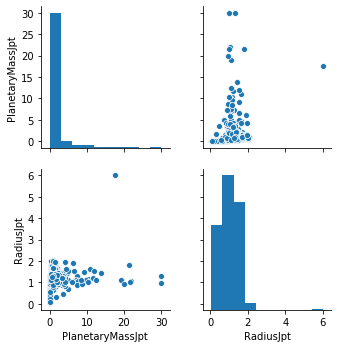

In [440]:
sns.pairplot(reg)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(reg['RadiusJpt'], reg['PlanetaryMassJpt'], test_size=0.1, random_state=101)

regressor = linear_model.LinearRegression()


In [442]:
regressor.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [443]:
reg_pred = regressor.predict(X_test.values.reshape(-1,1))
print(mean_squared_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))

23.071983062317116
0.04133784604099122


In [444]:
def get_volume(line):
  return 4/3 * np.pi * line

def get_density(line):
  return line/volumes[i]
volumes = reg['RadiusJpt'].apply(get_volume)

for line in reg.index:
  reg.loc[line]['Density'] = reg.loc[line]['RadiusJpt']/(4/3*(reg.loc[line]['RadiusJpt'])**3*(np.pi))


reg.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PlanetaryMassJpt,RadiusJpt,DiscoveryMethod
2,0.0014,0.054,transit
5,0.2500,0.840,transit
6,0.1700,0.820,transit
7,0.0220,0.147,transit
10,0.6000,1.240,transit


## Questão bônus

Deve-se criar um classificador baseado em estatística que identifique se os planetas realmente são redondos.

In [445]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
PlanetIdentifier        3584 non-null object
TypeFlag                3584 non-null int64
PlanetaryMassJpt        1313 non-null float64
RadiusJpt               2774 non-null float64
PeriodDays              3485 non-null float64
SemiMajorAxisAU         1406 non-null float64
Eccentricity            1108 non-null float64
PeriastronDeg           328 non-null float64
LongitudeDeg            43 non-null float64
AscendingNodeDeg        46 non-null float64
InclinationDeg          665 non-null float64
SurfaceTempK            741 non-null float64
AgeGyr                  2 non-null float64
DiscoveryMethod         3521 non-null object
DiscoveryYear           3574 non-null float64
LastUpdated             3576 non-null object
RightAscension          3574 non-null object
Declination             3574 non-null object
DistFromSunParsec       2133 non-null float64
HostStarMassSlrMass     3416 non-nul

In [446]:
planets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


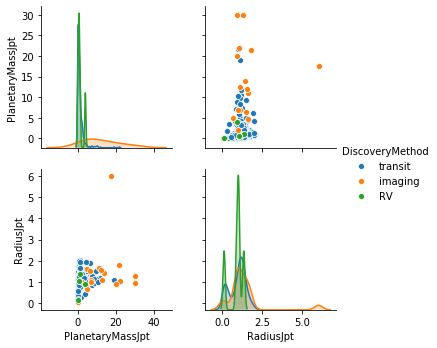

In [447]:
sns.pairplot(reg, hue='DiscoveryMethod')

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=1000, n_features=4,
                         n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

In [0]:
dicto = {'transit': 0, 'imaging': 1, 'RV': 1}
reg = reg.replace({'DiscoveryMethod':dicto})




/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


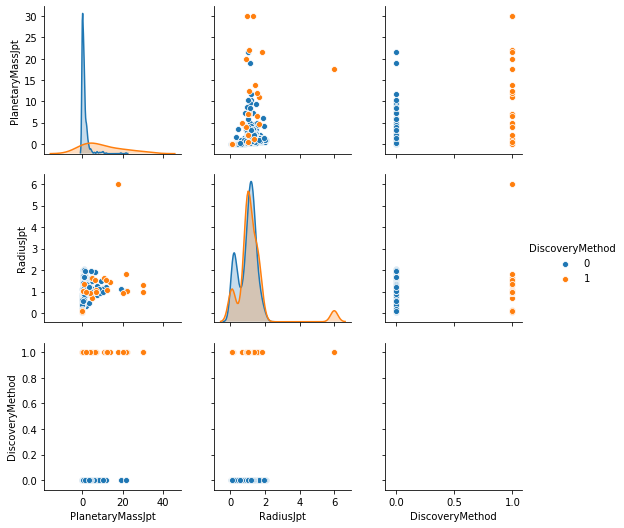

In [451]:
sns.pairplot(reg, hue='DiscoveryMethod')

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(reg.drop('DiscoveryMethod',axis =1), reg['DiscoveryMethod'], test_size=0.1, random_state=101)

In [456]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
resultado_final = neigh.predict(X_test)

In [459]:
print(confusion_matrix(y_test, resultado_final))
print(accuracy_score(y_test, resultado_final))

[[45  1]
 [ 1  2]]
0.9591836734693877


In [0]:
resultado_extra = neigh.predict(planet2[['']])